In [0]:
from torch import *
import numpy as np
import pandas

In [41]:
!pip install torchviz

In [0]:
np.random.seed(42)

In [0]:
x=np.random.randn(100,1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)


idx = np.arange(100)
np.random.shuffle(idx)

In [0]:
train_idx= idx[:80]
test_idx=idx[80:]

In [0]:
x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

In [0]:
np.random.seed(52)
a=np.random.randn(1)
b=np.random.randn(1)

In [47]:
print(a, b)
lr = 1e-1
n_epochs = 10000


[0.51947584] [-1.26875038]


In [0]:
for epoch in range(n_epochs):
  yhat=a+b*x_train
  error=(y_train-yhat)
  loss=(error**2).mean()
  
  a_grad=-2*error.mean()
  b_grad=-2*(x_train*error).mean()
  
  a=a-lr*a_grad
  b=b-lr*b_grad
    
  

In [49]:
print(a,b)

[0.99578039] [1.98516866]


In [50]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[0.99578039] [1.98516866]


In [51]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'


x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)


print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


In [0]:
a_t=torch.randn(1,requires_grad=True,dtype=torch.float)
b_t=torch.randn(1,requires_grad=True,dtype=torch.float)


In [53]:
print(a_t,b_t)

tensor([0.9216], requires_grad=True) tensor([1.5691], requires_grad=True)


In [57]:
# SECOND
# But what if we want to run it on a GPU? We could just send them to device, right?
a_t = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
b_t = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(a, b)
# Sorry, but NO! The to(device) "shadows" the gradient...

# THIRD
 #We can either create regular tensors and send them to the device (as we did with our data)
a = torch.randn(1, dtype=torch.float).to(device)
b = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
a.requires_grad_()
b.requires_grad_()
print(a, b)

tensor([1.1565], requires_grad=True) tensor([-0.0562], requires_grad=True)
tensor([-0.5876], requires_grad=True) tensor([-0.1655], requires_grad=True)


Always remmeber in pytorch if any method ends with a underscore then when it is applied to any variable it makes changes  to that variable inplace.That is why there is a significant diffrence between required_grad() and required_grad_(). 

In [58]:
#another easier approach to declare your variables and at the time of there declaration send them directly to the device like this
torch.manual_seed(42)
a_t = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b_t = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([-0.5876], requires_grad=True) tensor([-0.1655], requires_grad=True)


In [59]:
lr = 1e-1
n_epochs = 1000

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    # No more manual computation of gradients! 
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    # Let's check the computed gradients...
    print(a.grad)
    print(b.grad)
    
    # What about UPDATING the parameters? Not so fast...
    
    # FIRST ATTEMPT
    # AttributeError: 'NoneType' object has no attribute 'zero_'
    # a = a - lr * a.grad
    # b = b - lr * b.grad
    # print(a)

    # SECOND ATTEMPT
    # RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.
    # a -= lr * a.grad
    # b -= lr * b.grad        
    
    # THIRD ATTEMPT
    # We need to use NO_GRAD to keep the update out of the gradient computation
    # Why is that? It boils down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
    
    # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go...
    a.grad.zero_()
    b.grad.zero_()
    
print(a, b)


tensor([-1.1663])
tensor([-2.8676])
tensor([-0.9565])
tensor([-2.4258])
tensor([-0.7850])
tensor([-2.0519])
tensor([-0.6448])
tensor([-1.7354])
tensor([-0.5301])
tensor([-1.4675])
tensor([-0.4361])
tensor([-1.2409])
tensor([-0.3590])
tensor([-1.0492])
tensor([-0.2958])
tensor([-0.8870])
tensor([-0.2439])
tensor([-0.7498])
tensor([-0.2012])
tensor([-0.6338])
tensor([-0.1662])
tensor([-0.5357])
tensor([-0.1373])
tensor([-0.4528])
tensor([-0.1136])
tensor([-0.3826])
tensor([-0.0940])
tensor([-0.3234])
tensor([-0.0778])
tensor([-0.2732])
tensor([-0.0645])
tensor([-0.2309])
tensor([-0.0535])
tensor([-0.1951])
tensor([-0.0444])
tensor([-0.1648])
tensor([-0.0369])
tensor([-0.1392])
tensor([-0.0306])
tensor([-0.1176])
tensor([-0.0255])
tensor([-0.0994])
tensor([-0.0212])
tensor([-0.0839])
tensor([-0.0176])
tensor([-0.0709])
tensor([-0.0147])
tensor([-0.0599])
tensor([-0.0122])
tensor([-0.0506])
tensor([-0.0102])
tensor([-0.0427])
tensor([-0.0085])
tensor([-0.0361])
tensor([-0.0071])
tensor([-0

In [0]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

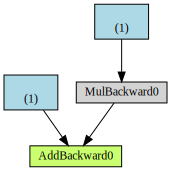

In [61]:
make_dot(yhat)

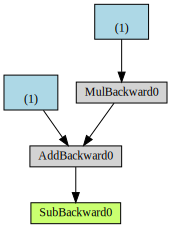

In [62]:
make_dot(error)

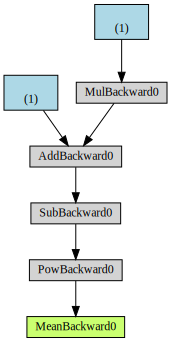

In [63]:
make_dot(loss)

In [0]:
#iknow this computation doesn't make nay sense but this is to demosntrate you can dynamic computation graphs in pytorch even using control flow statements

yhat=a+b*x_train_tensor
error=y_train_tensor-yhat
loss=(error**2).mean()

if loss>0:
  yhat2=b*x_train_tensor
  error2=y_train_tensor-yhat2
  
  
loss+=error2.mean()  

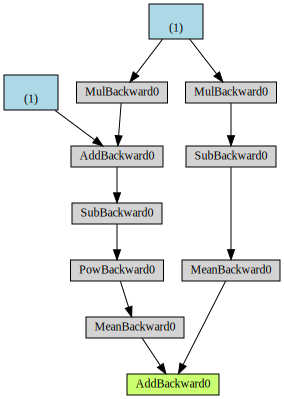

In [65]:
make_dot(loss)

In [66]:
#now let us see how we can compute gradients when we have many paramaters we will use the optimizer method with step finction and zero_grad , you can any kind of optimizer present in the pytorch docs that can be sgd or adam
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    loss.backward()    
    
    # No more manual update!
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizer.step()
    
    # No more telling PyTorch to let gradients go!
    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()
    
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([0.9958], requires_grad=True) tensor([1.9852], requires_grad=True)


In [67]:
#now let us tackle the loss computation using the pytorch usefull nn module using the predefined loss functions
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 1e-1
n_epochs = 1000

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    
    # No more manual loss!
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
print(a, b)


tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([0.9958], requires_grad=True) tensor([1.9852], requires_grad=True)


So!!! as you can see it works really well i am actually falling in love with pytorch
Now let us automate the whole process using the beautiful functions of pytorch

In [0]:
class MLR(nn.Module):
  def _init_(self):
    super._init_()
     # To make "a" and "b" real parameters of the model, we need to wrap them with nn.Parameter
    self.a = nn.ModuleList(Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)))
    self.b = nn.ModuleList(Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)))
        
  def forward(self,x):
    
    return self.a + self.b*x
        


In [93]:
torch.manual_seed(42)

# Now we can create a model and send it at once to the device
model = MLR().to(device)
# We can also inspect its parameters using its state_dict
print(model.state_dict())

OrderedDict()


In [94]:
torch.manual_seed(42)

# Now we can create a model and send it at once to the device
model = MLR()
# We can also inspect its parameters using its state_dict
print(model.state_dict())


#now let us fit our model
lr=1e-1
n_epochs=2000
#loss finction using nn
loss_fn=nn.MSELoss(reduction='mean')
model=MLR()
optimizer=optim.SGD(model.parameters(),lr=lr)
for epoch in range(n_epochs):
  #start model training
  
  model.train()
  
  #predictions of your model
  yhat=model(x_train_tensor)
  
  loss=loss_fn(y_train_tensor,yhat)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  
print(model.state_dict())  

OrderedDict()


ValueError: ignored

In [95]:

def make_train_step(model, loss_fn, optimizer):
    # Builds function that performs a step in the train loop
    def train_step(x, y):
        # Sets model to TRAIN mode
        model.train()
        # Makes predictions
        yhat = model(x)
        # Computes loss
        loss = loss_fn(y, yhat)
        # Computes gradients
        loss.backward()
        # Updates parameters and zeroes gradients
        optimizer.step()
        optimizer.zero_grad()
        # Returns the loss
        return loss.item()
    
    # Returns the function that will be called inside the train loop
    return train_step

# Creates the train_step function for our model, loss function and optimizer
model=MLR()
train_step = make_train_step(model, loss_fn, optimizer)
losses = []

# For each epoch...
for epoch in range(n_epochs):
    # Performs one train step and returns the corresponding loss
    loss = train_step(x_train_tensor, y_train_tensor)
    losses.append(loss)
    
# Checks model's parameters
print(model.state_dict())

AttributeError: ignored